In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import ShuffleSplit

In [237]:
data=pd.read_csv('/Users/y2z/Desktop/housing.csv')

In [238]:
data.sample(5)

,RM,LSTAT,PTRATIO,MEDV
405,5.648,14.10,20.2,436800.0
201,6.064,14.66,18.6,512400.0
399,6.782,25.79,20.2,157500.0
195,6.162,7.43,14.7,506100.0
481,6.019,12.92,19.2,445200.0


In [239]:
prices=data['MEDV']
features=data.drop('MEDV',axis=1)

In [240]:
prices.sample(5)

445    409500.0
114    388500.0
236    369600.0
140    294000.0
31     304500.0
Name: MEDV, dtype: float64

In [241]:
features.sample(5)

,RM,LSTAT,PTRATIO
161,5.854,11.64,14.7
440,5.936,16.94,20.2
456,6.980,11.66,20.2
322,6.316,5.68,20.2
28,6.495,12.80,21.0


In [242]:
data.shape

(489, 4)

In [243]:
data.describe(include='all')

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [244]:
np.min(prices)

105000.0

In [245]:
np.max(prices)

1024800.0

In [246]:
np.mean(prices)

454342.9447852761

In [247]:
data.sample(5)

,RM,LSTAT,PTRATIO,MEDV
124,5.879,17.58,19.1,394800.0
448,5.759,14.13,20.2,417900.0
353,3.561,7.12,20.2,577500.0
64,7.104,8.05,18.6,693000.0
213,6.951,9.71,17.4,560700.0


In [248]:
data.RM=round(data.RM)

/Users/y2z/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


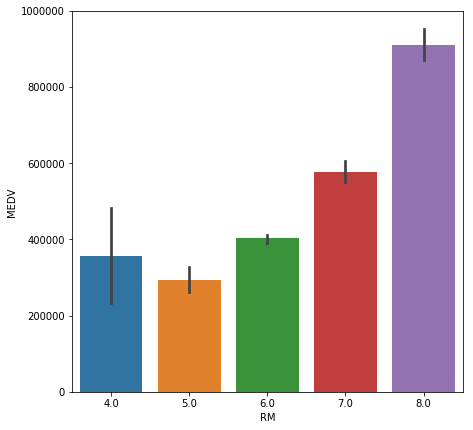

,RM,MEDV
144,5.0,247800.0
341,6.0,390600.0
324,6.0,443100.0
435,6.0,338100.0
72,6.0,478800.0


In [249]:
rm_medv=data[['RM','MEDV']].sort_values(by='RM',ascending=False)
plt.figure(figsize=(7,7))
sns.barplot(x='RM',y='MEDV',data=rm_medv)
plt.show()
rm_medv.sample(5)

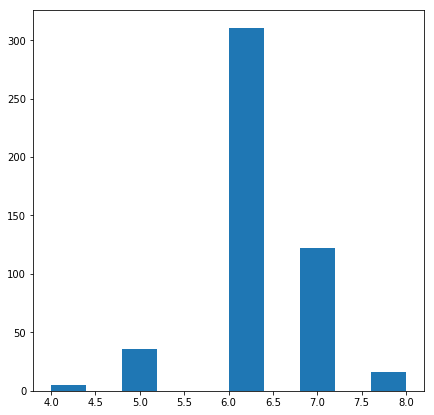

In [250]:
plt.figure(figsize=(7,7))
plt.hist(x='RM',data=data)
plt.show()

In [251]:
data.sample(5)

,RM,LSTAT,PTRATIO,MEDV
95,7.0,6.65,18.0,596400.0
91,6.0,8.20,17.8,462000.0
453,6.0,16.29,20.2,417900.0
427,6.0,23.79,20.2,226800.0
466,6.0,10.42,20.2,457800.0


In [252]:
data.LSTAT=round(data.LSTAT)
lstat_medv=data[['LSTAT','MEDV']].sort_values(by='LSTAT',ascending=False)

In [253]:
lstat_medv.head(5)

,LSTAT,MEDV
357,38.0,289800.0
397,37.0,147000.0
356,35.0,289800.0
395,34.0,375900.0
141,34.0,302400.0


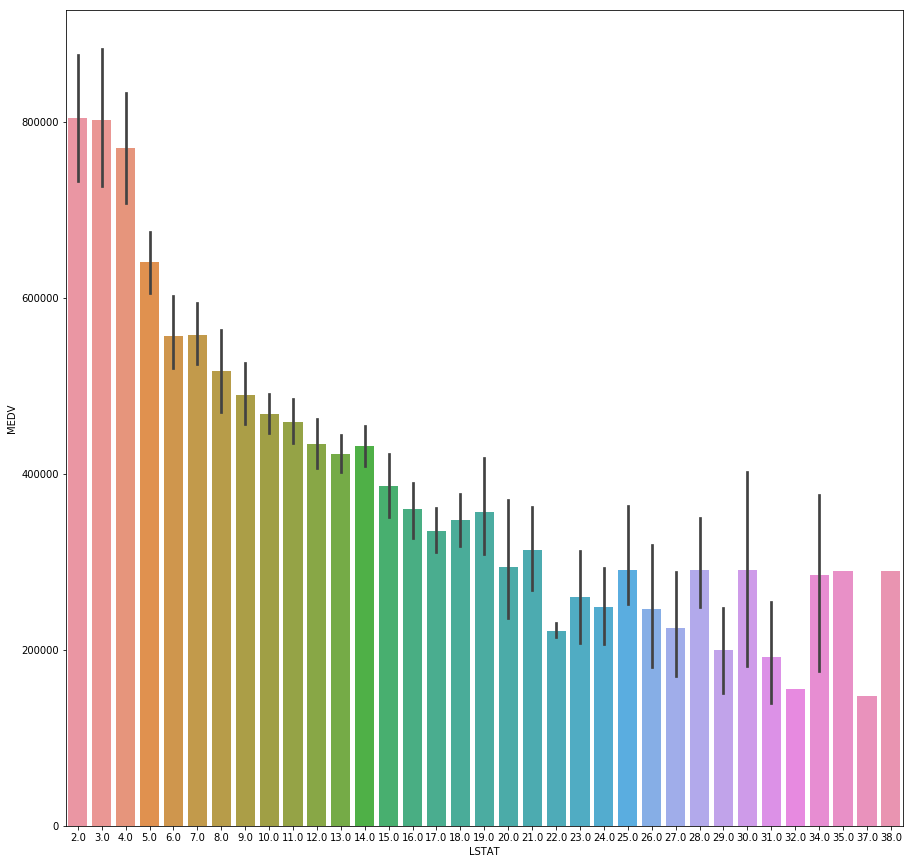

In [254]:
plt.figure(figsize=(15,15))
sns.barplot(x='LSTAT',y='MEDV',data=lstat_medv)
plt.show()

In [255]:
data.sample(5)

,RM,LSTAT,PTRATIO,MEDV
190,7.0,4.0,12.6,699300.0
118,6.0,15.0,17.8,428400.0
341,6.0,8.0,18.3,390600.0
121,6.0,14.0,19.1,426300.0
360,7.0,21.0,20.2,279300.0


In [256]:
data.PTRATIO=round(data.PTRATIO)
ptr_medv=data[['PTRATIO','MEDV']].sort_values(by='PTRATIO',ascending=False)


In [257]:
ptr_medv.head(5)

,PTRATIO,MEDV
343,22.0,382200.0
344,22.0,432600.0
488,21.0,249900.0
32,21.0,277200.0
34,21.0,283500.0


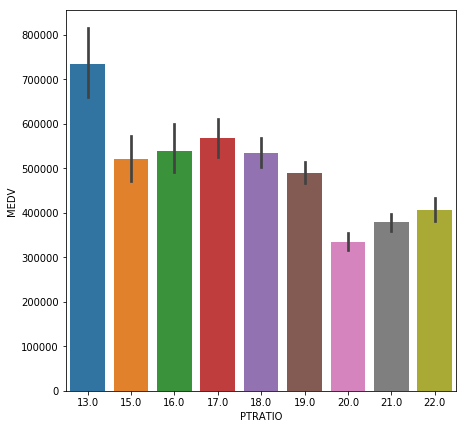

,RM,LSTAT,PTRATIO,MEDVBAND
225,8.0,4.0,17.0,800000
298,6.0,10.0,18.0,400000
359,7.0,23.0,20.0,200000
468,6.0,11.0,20.0,500000
44,6.0,10.0,18.0,500000


In [258]:
plt.figure(figsize=(7,7))
sns.barplot(x='PTRATIO',y='MEDV',data=data)
plt.show()
data['MEDVBAND']=pd.qcut(data['MEDV'],8,labels=[100000,200000,300000,400000,500000,600000,700000,800000])
data=data.drop('MEDV',axis=1)
data.sample(5)





In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [260]:
x_train,x_val,y_train,y_val=train_test_split(features,prices,test_size=.2)

In [261]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_val)
acc_logreg=round(accuracy_score(y_pred,y_val)*100,2)
print("Accuracy:",acc_logreg)

Accuracy: 2.04


/Users/y2z/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/y2z/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
